In [27]:
import random
import threading
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from parameters import *
from utils import newTrain,cal_ranking,stop,back_to_schedule,generate_schedule

In [28]:
# generate data
stations_N

20

In [29]:
df=pd.read_csv('../simulated_data/passenger_data_uniform.csv')
df.rename(columns={'start_': 'start','end_':'end'}, inplace=True)
df

,start,end,time
0,6,9,453
1,19,11,642
2,15,11,434
3,9,7,567
4,6,10,638
...,...,...,...
19995,3,19,552
19996,5,7,568
19997,8,6,586
19998,14,19,637


In [30]:
time=list(np.random.uniform(0, 1,len(df)).astype(int))
df['time'] = time
df['id']=df.index
df['forward'] = df.apply(lambda row: 1 if row['start'] < row['end'] else 0, axis=1)
df=df[df['start']!=df['end']]
df['start_']=df.apply(lambda row: row['start'] if row['forward']==1 else stations_N*2-1-row['start'], axis=1)
df['end_']=df.apply(lambda row: row['end'] if row['forward']==1 else stations_N*2-1-row['end'], axis=1)
df

,start,end,time,id,forward,start_,end_
0,6,9,0,0,1,6,9
1,19,11,0,1,0,20,28
2,15,11,0,2,0,24,28
3,9,7,0,3,0,30,32
4,6,10,0,4,1,6,10
...,...,...,...,...,...,...,...
19995,3,19,0,19995,1,3,19
19996,5,7,0,19996,1,5,7
19997,8,6,0,19997,0,31,33
19998,14,19,0,19998,1,14,19


In [31]:
# sampled_df  = df.sample(n=300, replace=False)

  0%|          | 0/8 [00:00<?, ?it/s]

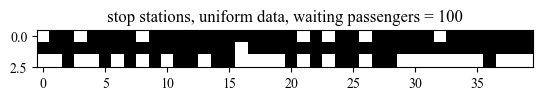

 12%|█▎        | 1/8 [00:04<00:32,  4.64s/it]

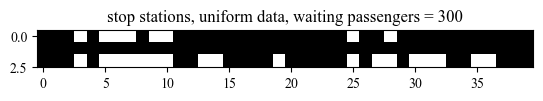

 25%|██▌       | 2/8 [00:09<00:28,  4.69s/it]

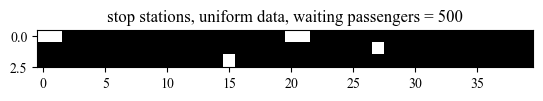

 38%|███▊      | 3/8 [00:14<00:23,  4.79s/it]

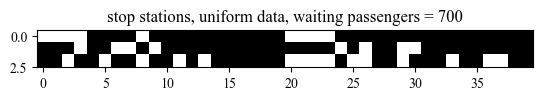

 50%|█████     | 4/8 [00:18<00:18,  4.67s/it]

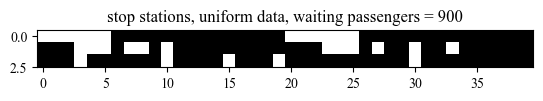

 62%|██████▎   | 5/8 [00:23<00:13,  4.53s/it]

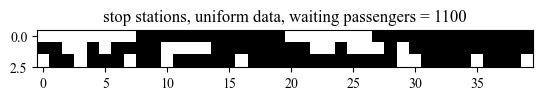

 75%|███████▌  | 6/8 [00:27<00:08,  4.41s/it]

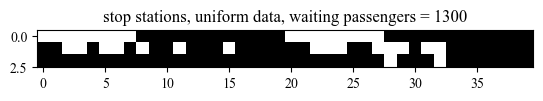

 88%|████████▊ | 7/8 [00:31<00:04,  4.34s/it]

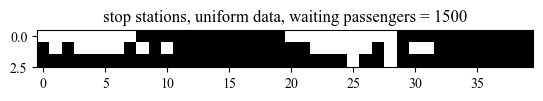

100%|██████████| 8/8 [00:35<00:00,  4.42s/it]


In [32]:
def hamming_distance(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length")
    distance = 0
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            distance += 1
    return distance

test=[100,300,500,700,900,1100,1300,1500]
stop_num1=[]
stop_num2=[]
stop_num3=[]
dist_12=[]
dist_13=[]
dist_23=[]

al1=[]
al2=[]
al3=[]

for i in tqdm(range(len(test))):
    sampled_df  = df.sample(n=test[i], replace=False)
    schedule_1=newTrain(StartTrain_time=0, df_changing=sampled_df.copy(),para=3, algorithm=1)[0]
    schedule_1=np.array(schedule_1.iloc[:,stations_N*2:-1].T[0])
    schedule_2=newTrain(StartTrain_time=0, df_changing=sampled_df.copy(),para=3, algorithm=2)[0]
    schedule_2=np.array(schedule_2.iloc[:,stations_N*2:-1].T[0])
    df_pair=cal_ranking(sampled_df.copy())
    schedule_3=generate_schedule(df_pair=df_pair.copy(),reduce=0.3)
    
    stop_num1.append(np.sum(schedule_1))
    stop_num2.append(np.sum(schedule_2))
    stop_num3.append(np.sum(schedule_3))
    
    al1.append(schedule_1)
    al2.append(schedule_2)
    al3.append(schedule_3)

    
    dist_12.append(hamming_distance(schedule_1.copy(),schedule_2.copy()))
    dist_13.append(hamming_distance(schedule_1.copy(),schedule_3.copy()))
    dist_23.append(hamming_distance(schedule_2.copy(),schedule_3.copy()))
    
    temp=np.vstack((schedule_1, schedule_2, schedule_3))
    cmap = mcolors.ListedColormap(['none', 'black'])
    plt.title('stop stations, uniform data, waiting passengers = {}'.format(test[i]))
    plt.imshow(temp, cmap=cmap, interpolation='nearest')
    plt.show()

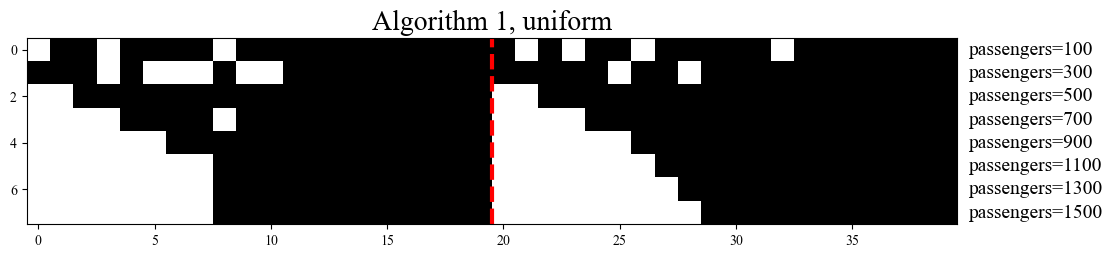

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['font.family'] = 'Times New Roman'


plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 1, uniform', fontsize=20)
plt.imshow(al1, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


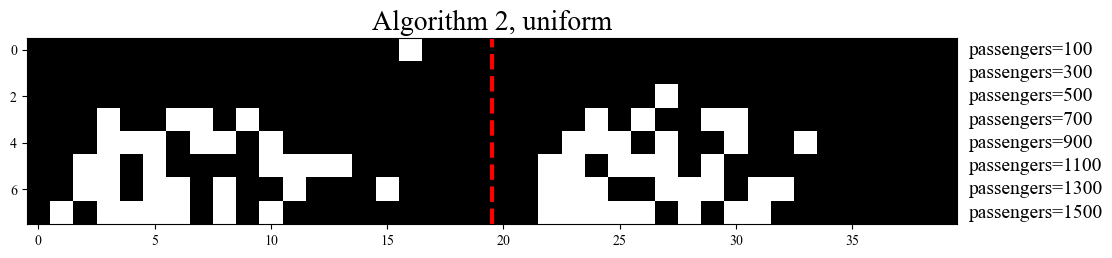

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 2, uniform', fontsize=20)
plt.imshow(al2, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


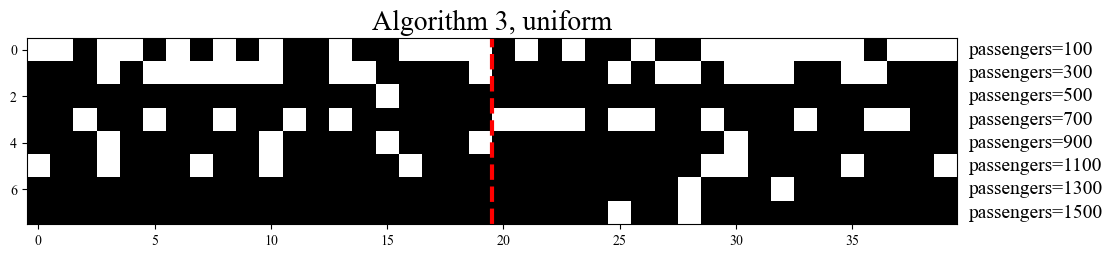

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 3, uniform', fontsize=20)
plt.imshow(al3, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


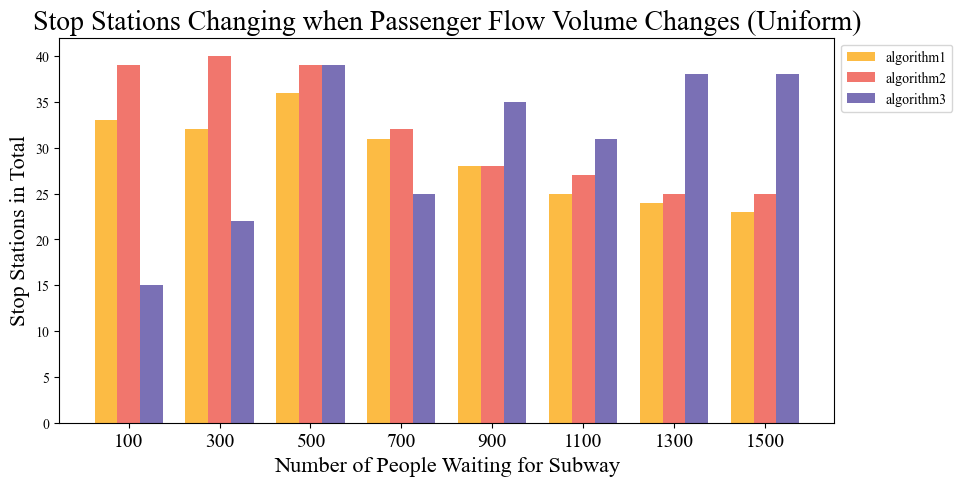

In [36]:
import matplotlib.pyplot as plt

# 示例数据
x = test.copy()
y1 = stop_num1.copy()
y2 = stop_num2.copy()
y3 = stop_num3.copy()

bar_width = 0.25
bar_gap = 0.05

# 绘制柱状图
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(x)), y1, width=bar_width, label='algorithm1',color='#FCBB44')
plt.bar(np.arange(len(x)) + bar_width , y2, width=bar_width, label='algorithm2',color='#F1766D')
plt.bar(np.arange(len(x)) + 2 * (bar_width ), y3, width=bar_width, label='algorithm3',color='#7A70B5')

# 设置x轴刻度
plt.xticks(np.arange(len(x)) + bar_width, x,fontsize=14)

# 添加标签、标题和图例
plt.xlabel('Number of People Waiting for Subway',fontsize=16)
plt.ylabel('Stop Stations in Total',fontsize=16)
plt.title('Stop Stations Changing when Passenger Flow Volume Changes (Uniform)',fontsize=20)
plt.legend(fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.show()


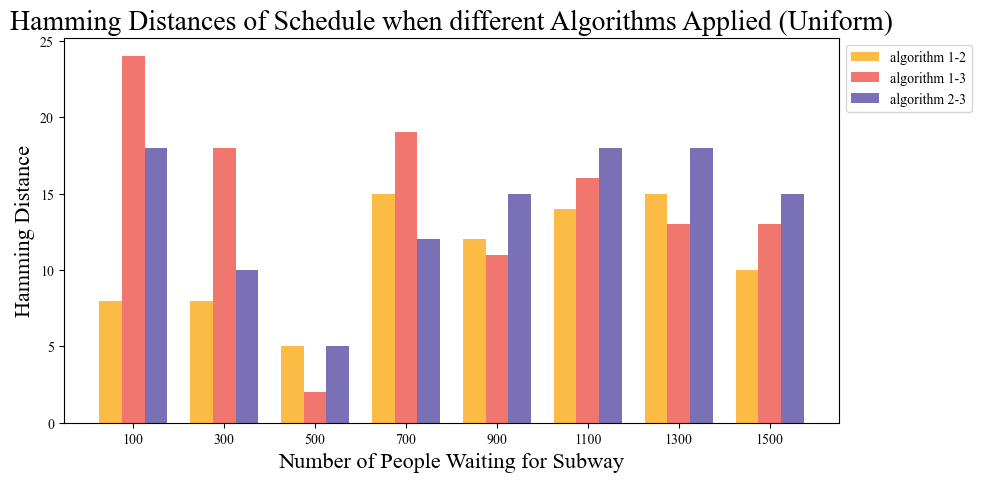

In [38]:
import matplotlib.pyplot as plt

# 示例数据
x = test.copy()
y1 = dist_12.copy()
y2 = dist_23.copy()
y3 = dist_13.copy()

bar_width = 0.25
bar_gap = 0.05

# 绘制柱状图
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(x)), y1, width=bar_width, label='algorithm 1-2',color='#FCBB44')
plt.bar(np.arange(len(x)) + bar_width , y2, width=bar_width, label='algorithm 1-3',color='#F1766D')
plt.bar(np.arange(len(x)) + 2 * (bar_width ), y3, width=bar_width, label='algorithm 2-3',color='#7A70B5')

# 设置x轴刻度
plt.xticks(np.arange(len(x)) + bar_width, x)

# 添加标签、标题和图例
plt.xlabel('Number of People Waiting for Subway',fontsize=16)
plt.ylabel('Hamming Distance',fontsize=16)
plt.title('Hamming Distances of Schedule when different Algorithms Applied (Uniform)',fontsize=20)
plt.legend(fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## normal analysis

In [39]:
df=pd.read_csv('../simulated_data/passenger_data_normal.csv')
df.rename(columns={'start_': 'start','end_':'end'}, inplace=True)

time=list(np.random.uniform(0, 1,len(df)).astype(int))
df['time'] = time
df['id']=df.index
df['forward'] = df.apply(lambda row: 1 if row['start'] < row['end'] else 0, axis=1)
df=df[df['start']!=df['end']]
df['start_']=df.apply(lambda row: row['start'] if row['forward']==1 else stations_N*2-1-row['start'], axis=1)
df['end_']=df.apply(lambda row: row['end'] if row['forward']==1 else stations_N*2-1-row['end'], axis=1)
df

,start,end,time,id,forward,start_,end_
0,3,9,0,0,1,3,9
1,15,9,0,1,0,24,30
2,8,5,0,2,0,31,34
3,16,15,0,3,0,23,24
4,11,15,0,4,1,11,15
...,...,...,...,...,...,...,...
19995,11,7,0,19995,0,28,32
19996,3,5,0,19996,1,3,5
19997,15,4,0,19997,0,24,35
19998,4,10,0,19998,1,4,10


  0%|          | 0/8 [00:00<?, ?it/s]

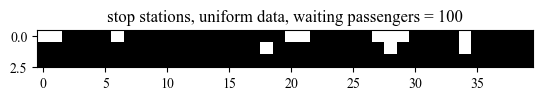

 12%|█▎        | 1/8 [00:04<00:32,  4.69s/it]

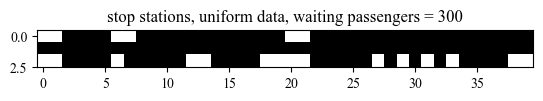

 25%|██▌       | 2/8 [00:09<00:28,  4.70s/it]

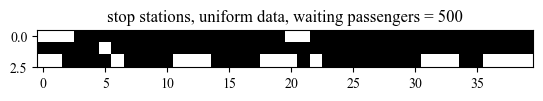

 38%|███▊      | 3/8 [00:14<00:24,  4.82s/it]

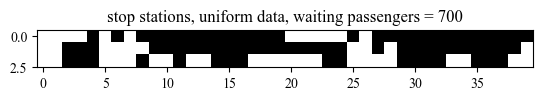

 50%|█████     | 4/8 [00:18<00:18,  4.64s/it]

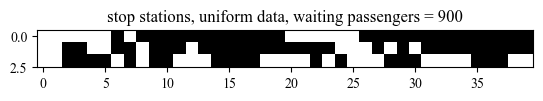

 62%|██████▎   | 5/8 [00:23<00:13,  4.58s/it]

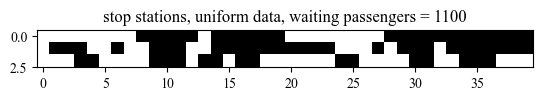

 75%|███████▌  | 6/8 [00:27<00:08,  4.43s/it]

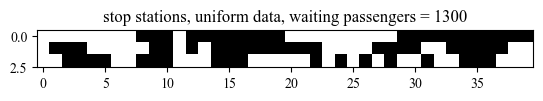

 88%|████████▊ | 7/8 [00:32<00:04,  4.53s/it]

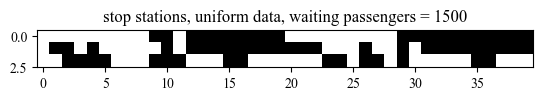

100%|██████████| 8/8 [00:36<00:00,  4.56s/it]


In [40]:
def hamming_distance(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length")
    distance = 0
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            distance += 1
    return distance

test=[100,300,500,700,900,1100,1300,1500]
stop_num1=[]
stop_num2=[]
stop_num3=[]
dist_12=[]
dist_13=[]
dist_23=[]

al1=[]
al2=[]
al3=[]

for i in tqdm(range(len(test))):
    sampled_df  = df.sample(n=test[i], replace=False)
    schedule_1=newTrain(StartTrain_time=0, df_changing=sampled_df.copy(),para=3, algorithm=1)[0]
    schedule_1=np.array(schedule_1.iloc[:,stations_N*2:-1].T[0])
    schedule_2=newTrain(StartTrain_time=0, df_changing=sampled_df.copy(),para=3, algorithm=2)[0]
    schedule_2=np.array(schedule_2.iloc[:,stations_N*2:-1].T[0])
    df_pair=cal_ranking(sampled_df.copy())
    schedule_3=generate_schedule(df_pair=df_pair.copy(),reduce=0.3)
    
    stop_num1.append(np.sum(schedule_1))
    stop_num2.append(np.sum(schedule_2))
    stop_num3.append(np.sum(schedule_3))
    
    al1.append(schedule_1)
    al2.append(schedule_2)
    al3.append(schedule_3)

    
    dist_12.append(hamming_distance(schedule_1.copy(),schedule_2.copy()))
    dist_13.append(hamming_distance(schedule_1.copy(),schedule_3.copy()))
    dist_23.append(hamming_distance(schedule_2.copy(),schedule_3.copy()))
    
    temp=np.vstack((schedule_1, schedule_2, schedule_3))
    cmap = mcolors.ListedColormap(['none', 'black'])
    plt.title('stop stations, uniform data, waiting passengers = {}'.format(test[i]))
    plt.imshow(temp, cmap=cmap, interpolation='nearest')
    plt.show()

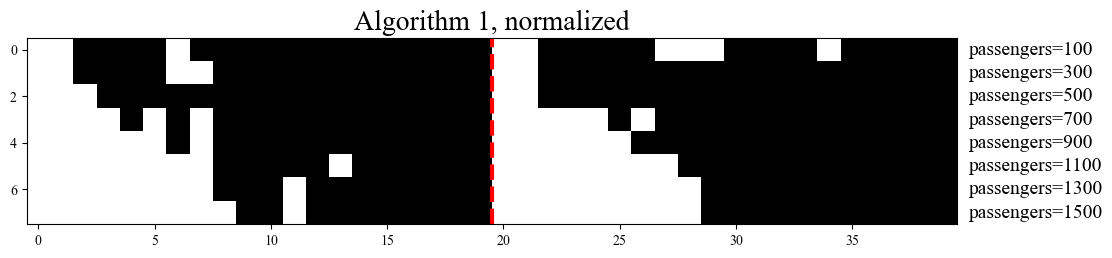

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 1, normalized', fontsize=20)
plt.imshow(al1, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


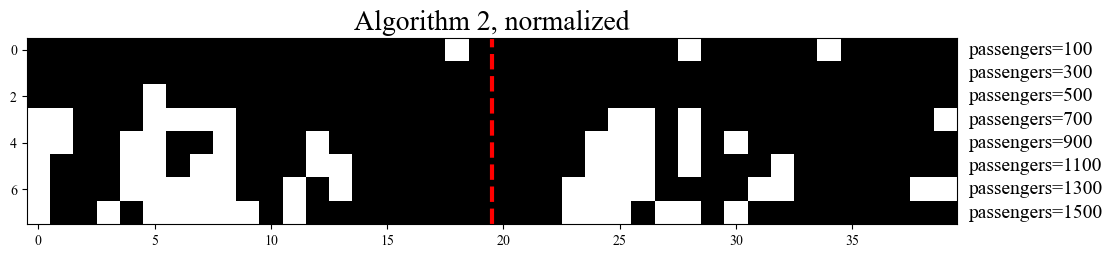

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 2, normalized', fontsize=20)
plt.imshow(al2, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


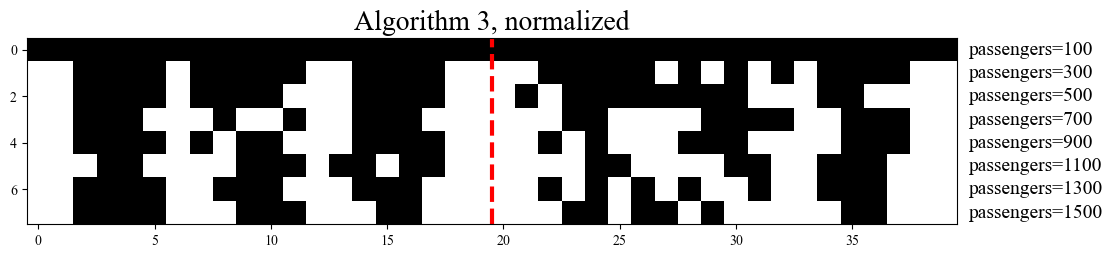

In [43]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 4))
cmap = mcolors.ListedColormap(['none', 'black'])
plt.title('Algorithm 3, normalized', fontsize=20)
plt.imshow(al3, cmap=cmap, interpolation='nearest')

# 在每行右边添加文本
for j in range(len(al3)):
    plt.text(len(al3[0]), j, 'passengers={}'.format(test[j]), ha='left', va='center', color='black', fontsize=14)

# 画竖线
plt.axvline(x=19.5, color='red', linestyle='--',linewidth=3)

plt.show()


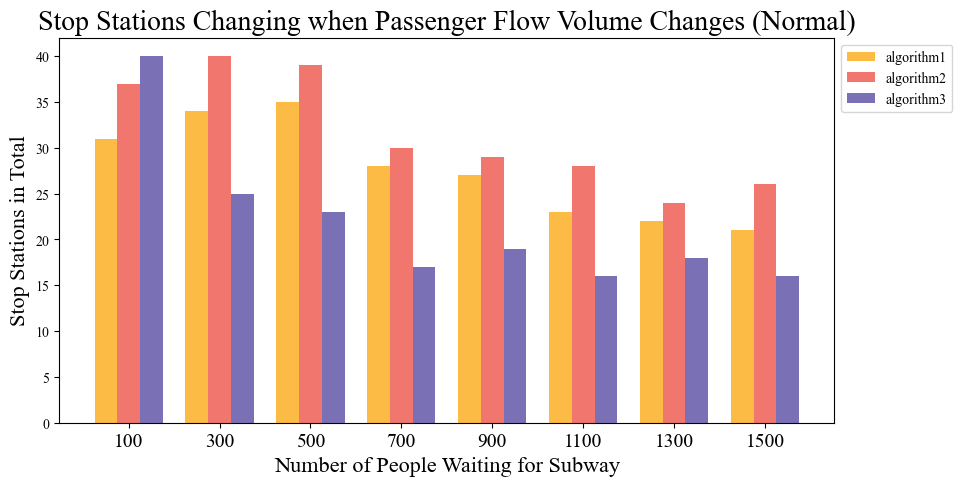

In [44]:
import matplotlib.pyplot as plt

# 示例数据
x = test.copy()
y1 = stop_num1.copy()
y2 = stop_num2.copy()
y3 = stop_num3.copy()



bar_width = 0.25
bar_gap = 0.05

# 绘制柱状图
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(x)), y1, width=bar_width, label='algorithm1',color='#FCBB44')
plt.bar(np.arange(len(x)) + bar_width , y2, width=bar_width, label='algorithm2',color='#F1766D')
plt.bar(np.arange(len(x)) + 2 * (bar_width ), y3, width=bar_width, label='algorithm3',color='#7A70B5')

# 设置x轴刻度
plt.xticks(np.arange(len(x)) + bar_width, x,fontsize=14)

# 添加标签、标题和图例
plt.xlabel('Number of People Waiting for Subway',fontsize=16)
plt.ylabel('Stop Stations in Total',fontsize=16)
plt.title('Stop Stations Changing when Passenger Flow Volume Changes (Normal)',fontsize=20)
plt.legend(fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.show()


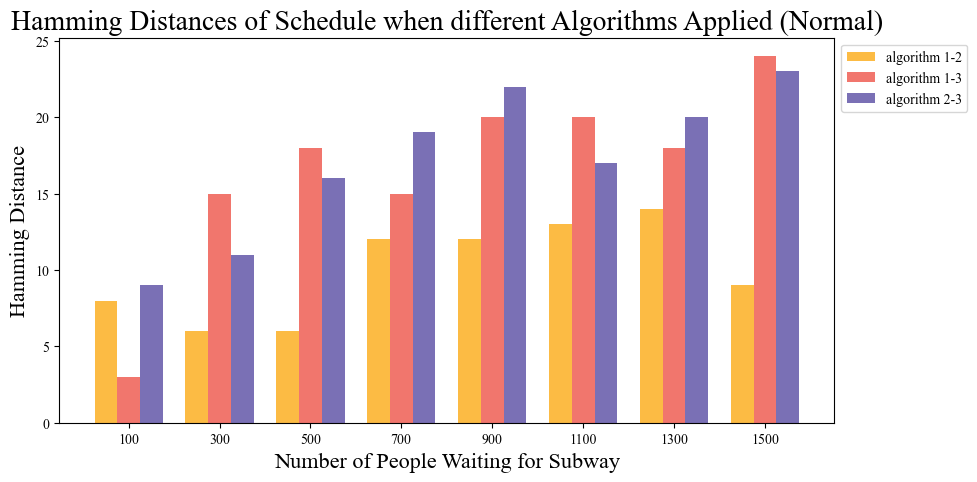

In [47]:
import matplotlib.pyplot as plt

# 示例数据
x = test.copy()
y1 = dist_12.copy()
y2 = dist_23.copy()
y3 = dist_13.copy()

bar_width = 0.25
bar_gap = 0.05

# 绘制柱状图
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(x)), y1, width=bar_width, label='algorithm 1-2',color='#FCBB44')
plt.bar(np.arange(len(x)) + bar_width , y2, width=bar_width, label='algorithm 1-3',color='#F1766D')
plt.bar(np.arange(len(x)) + 2 * (bar_width ), y3, width=bar_width, label='algorithm 2-3',color='#7A70B5')

# 设置x轴刻度
plt.xticks(np.arange(len(x)) + bar_width, x)

# 添加标签、标题和图例
plt.xlabel('Number of People Waiting for Subway',fontsize=16)
plt.ylabel('Hamming Distance',fontsize=16)
plt.title('Hamming Distances of Schedule when different Algorithms Applied (Normal)',fontsize=20)
plt.legend(fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()